### Relax Challenge

In this notebook, I create a field to denote which users are considered "Adopted" and rank features which are significant in determining if a user is adopted or not.

In [61]:
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns


In [19]:
df = pd.read_csv('takehome_user_engagement.csv')

In [21]:
df.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
time_stamp    207917 non-null object
user_id       207917 non-null int64
visited       207917 non-null int64
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [23]:
df = df.groupby('user_id').sum()

In [24]:
df.head()

,visited
user_id,
1,1
2,14
3,1
4,1
5,1


In [32]:
df = df.reset_index()


In [34]:
df['adopted'] = [1 if x>=3 else 0 for x in df['visited']]

In [35]:
df.head()

,user_id,visited,adopted
0,1,1,0
1,2,14,1
2,3,1,0
3,4,1,0
4,5,1,0


In [43]:
df.columns = ['object_id', 'visited', 'adopted']

In [41]:
df_users = pd.read_csv('takehome_users.csv', encoding='latin-1')

In [42]:
df_users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [44]:
df = pd.merge(df_users, df, how='left', on='object_id')

In [45]:
df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,visited,adopted
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,1.0,0.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,14.0,1.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,1.0,0.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,1.0,0.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,1.0,0.0


In [65]:
df_grouped = df.groupby('adopted').sum()

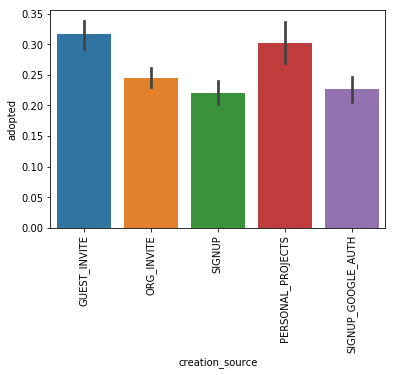

In [69]:
sns.barplot(x='creation_source', y='adopted', data=df)
plt.xticks(rotation=90)
plt.show()

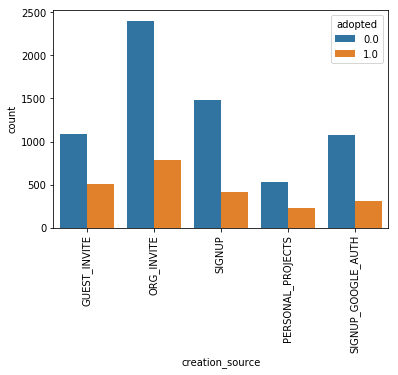

In [67]:
sns.countplot(x='creation_source', data=df, hue='adopted')
plt.xticks(rotation=90)
plt.show()

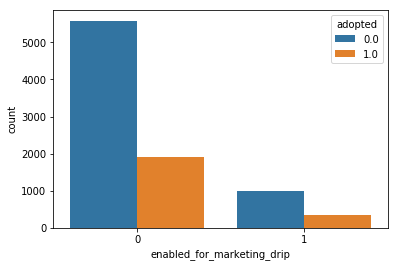

In [68]:
sns.countplot(x='enabled_for_marketing_drip', data=df, hue='adopted')
plt.show()

It is observed that guests who have a creation source of "guest_invite" are more likely to be adopted than other creation sources.